# 一、CART剪枝

# 二、Hoeffding不等式

# 三、奥运视频热议度数据分析

## 1.绘制评论量和点赞数的直方图

In [1]:
from matplotlib import pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
import pandas as pd

In [2]:
df = pd.read_csv('djolpdata.csv')
df.head(10)

,hot_or_not,type_sv,nar_angle,zf_sv,length_log,title_sv,media_type,media_fans_log,type_time_effe,month1,love_sv_log,com_sv_log
0,热议,传统话题,品牌宣传,中,1.000000,#东京奥运会倒计时1天 长风破浪会有时，直挂云帆济沧海。勇攀高峰吧！还有1天，我们就是一起冒...,主办方及授权传播主体,5.276462,即时性,1,4.806180,3.386856
1,热议,传统话题,品牌宣传,中,1.000000,#东京奥运会倒计时2天 奥林匹克之火，即将点亮世界 距离#东京奥运会 开幕还有2天啦,主办方及授权传播主体,5.276462,即时性,1,4.301030,3.082785
2,非热议,传统话题,品牌宣传,中,1.477121,#东京奥运会倒计时4天 2021年7月23日 北京时间19:00 #东京奥运 开幕在即,主办方及授权传播主体,5.276462,即时性,1,3.294466,1.633468
3,非热议,传统话题,品牌宣传,中,1.477121,#东京奥运会倒计时3天 还有3天#东京奥运会即将开幕,主办方及授权传播主体,5.276462,即时性,1,2.627366,1.447158
4,非热议,传统话题,品牌宣传,中,1.079181,#夺冠2021 东京奥运会倒计时一天，运动健儿们加油！#东京奥运会,其他机构或个人自媒体,5.369216,即时性,1,2.136721,0.477121
5,热议,传统话题,品牌宣传,中,1.000000,#东京奥运会倒计时3天 山水迢迢，相逢必有时。距离#东京奥运会 开幕还有3天啦,主办方及授权传播主体,5.276462,即时性,1,3.642465,2.447158
6,非热议,传统话题,品牌宣传,中,1.041393,#东京奥运会 #倒计时 2天#奥运会,其他机构或个人自媒体,2.230449,即时性,1,0.000000,0.000000
7,非热议,传统话题,品牌宣传,中,1.000000,#东京奥运会倒计时4天 星河滚烫，梦想绽放。距离#东京奥运会 开幕还有4天啦,主办方及授权传播主体,5.276462,即时性,1,3.232488,1.995635
8,非热议,传统话题,品牌宣传,中,0.903090,东京奥运会倒计时3天,其他机构或个人自媒体,6.171726,即时性,1,2.426511,0.698970
9,非热议,传统话题,品牌宣传,中,2.164353,东京奥运会倒计时（上）你喜欢奥运会的什么项目？ #东京奥运会 #奥运 #明星 #老外 ...,其他机构或个人自媒体,4.763428,即时性,1,0.000000,0.000000


对数评论量直方图：

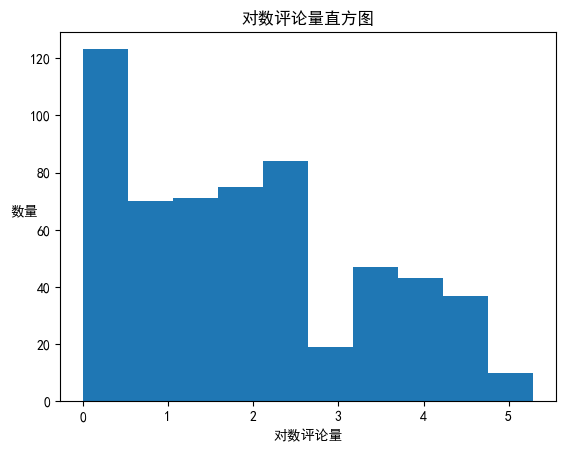

In [3]:
plt.hist(df['com_sv_log'])
plt.title('对数评论量直方图')
plt.xlabel('对数评论量')
plt.ylabel('数量',rotation='horizontal') # 标签旋转
plt.show()

对数点赞数直方图：

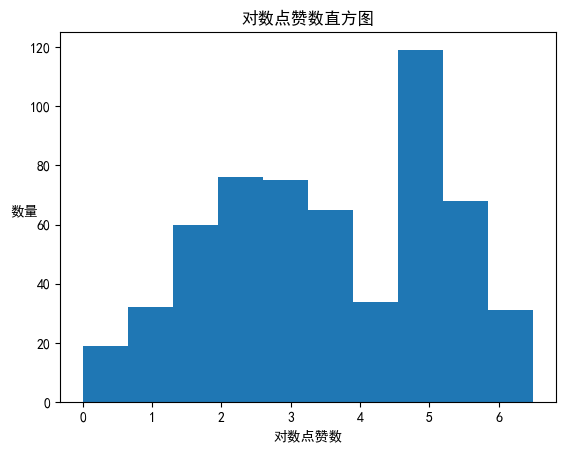

In [4]:
plt.hist(df['love_sv_log'])
plt.title('对数点赞数直方图')
plt.xlabel('对数点赞数')
plt.ylabel('数量',rotation='horizontal') # 标签旋转
plt.show()

分析：可以看出评论量和点赞数基本呈相反的分布，评论量分布的趋势为高评论量占比更少，点赞数分布的趋势为高点赞量占比更多。

## 2.分组、转因子变量

按照评论量对数是否大于2进行分组的清洗工作在表格中已事先做好。

符号类型变量转因子变量：

(factor变量在R语言中便于进入模型处理，但在sklearn中不易处理，所以在这里我暂时处理成哑变量了)

In [5]:
str_cns = ['type_sv','nar_angle','zf_sv','media_type','type_time_effe']
new_cns = []
length = len(df)
df2 = df.iloc[:,:]
for str_cn in str_cns:
    d_types = list(df[str_cn].value_counts().keys())
    for value in d_types:
        value = str(value) # 防止特殊情况报错
        tmp = str_cn + '_' + value
        df2[tmp] = 0
        new_cns.append(tmp)
    for i in range(length):
        df2.loc[i, str_cn + '_' + df2.loc[i,str_cn]] = 1
new_cns = new_cns + ['length_log', 'media_fans_log','month1']
df2 = df2[new_cns]
df2.head(10)

,type_sv_传统话题,type_sv_非传统话题,type_sv_被动回应,nar_angle_要素解读,nar_angle_突发事件,nar_angle_明星团队,nar_angle_品牌宣传,nar_angle_赛事周边,zf_sv_正,zf_sv_中,...,media_type_其他机构或个人自媒体,media_type_非授权商业媒体,media_type_体育专业媒体,media_type_主办方及授权传播主体,type_time_effe_即时性,type_time_effe_长期,type_time_effe_短期,length_log,media_fans_log,month1
0,1,0,0,0,0,0,1,0,0,1,...,0,0,0,1,1,0,0,1.000000,5.276462,1
1,1,0,0,0,0,0,1,0,0,1,...,0,0,0,1,1,0,0,1.000000,5.276462,1
2,1,0,0,0,0,0,1,0,0,1,...,0,0,0,1,1,0,0,1.477121,5.276462,1
3,1,0,0,0,0,0,1,0,0,1,...,0,0,0,1,1,0,0,1.477121,5.276462,1
4,1,0,0,0,0,0,1,0,0,1,...,1,0,0,0,1,0,0,1.079181,5.369216,1
5,1,0,0,0,0,0,1,0,0,1,...,0,0,0,1,1,0,0,1.000000,5.276462,1
6,1,0,0,0,0,0,1,0,0,1,...,1,0,0,0,1,0,0,1.041393,2.230449,1
7,1,0,0,0,0,0,1,0,0,1,...,0,0,0,1,1,0,0,1.000000,5.276462,1
8,1,0,0,0,0,0,1,0,0,1,...,1,0,0,0,1,0,0,0.903090,6.171726,1
9,1,0,0,0,0,0,1,0,0,1,...,1,0,0,0,1,0,0,2.164353,4.763428,1


## 3.描述性分析

### (1)视频长度

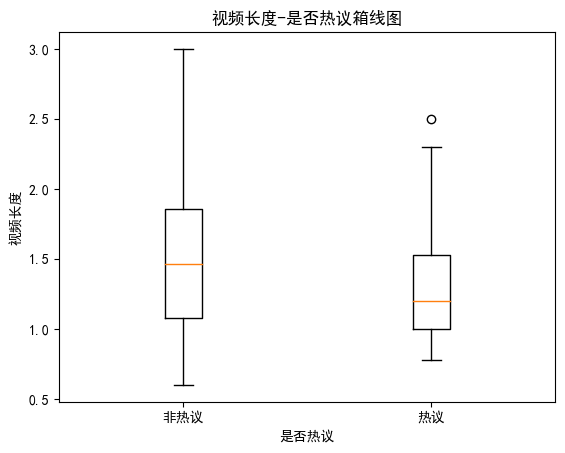

In [6]:
data_0 = df[df['hot_or_not'] == '非热议'] # 非热议样本
data_1 = df[df['hot_or_not'] == '热议'] # 热议样本
var_name = 'length_log'
names = ['非热议','热议']
box = [data_0[var_name], data_1[var_name]]
ax = plt.subplot()
ax.boxplot(box)
ax.set_xticklabels(names)
plt.xlabel('是否热议')
plt.ylabel('视频长度')
plt.title(f'视频长度-是否热议箱线图')
plt.show()

分析：可以看出短视频成为热议的可能性更大

由于以下三种变量都是类别型变量，因此下面选择因变量为对数评论数

### (2)话题类型

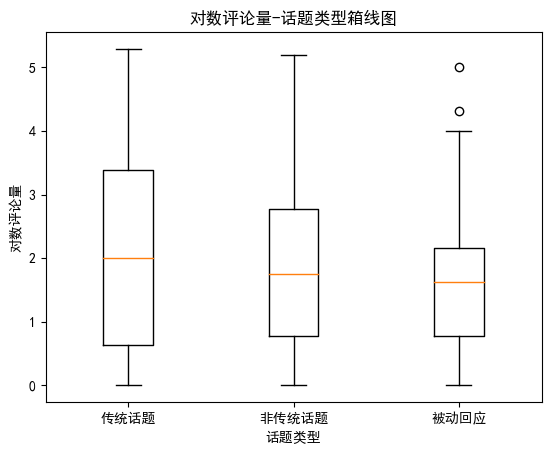

In [7]:
cname = 'com_sv_log'
str_cn = 'type_sv'
d_types = list(df[str_cn].value_counts().keys())
vols = [df[df[str_cn] == d_type][cname] for d_type in d_types]
ax = plt.subplot()
ax.boxplot(vols)
ax.set_xticklabels(d_types)
plt.xlabel('话题类型')
plt.ylabel('对数评论量')
plt.title('对数评论量-话题类型箱线图')
plt.show()

分析：可以看到话题类型中热议程度从大到小依次为传统话题、非传统话题、被动回应。

### (3)叙事角度

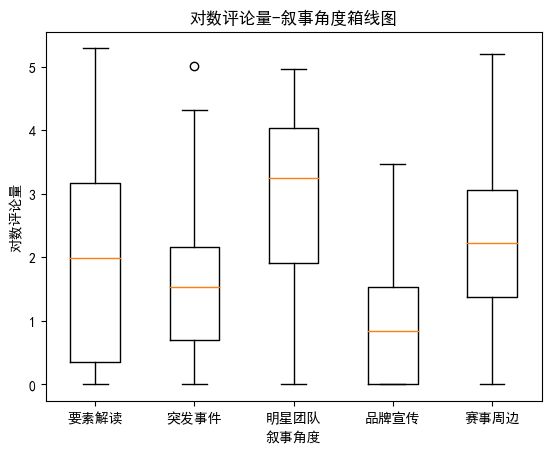

In [8]:
cname = 'com_sv_log'
str_cn = 'nar_angle'
d_types = list(df[str_cn].value_counts().keys())
vols = [df[df[str_cn] == d_type][cname] for d_type in d_types]
ax = plt.subplot()
ax.boxplot(vols)
ax.set_xticklabels(d_types)
plt.xlabel('叙事角度')
plt.ylabel('对数评论量')
plt.title('对数评论量-叙事角度箱线图')
plt.show()

分析：可以看到叙事角度中热议程度从大到小依次为明星团队、赛事周边、要素解读、突发事件、品牌宣传。

### (4)态度倾向

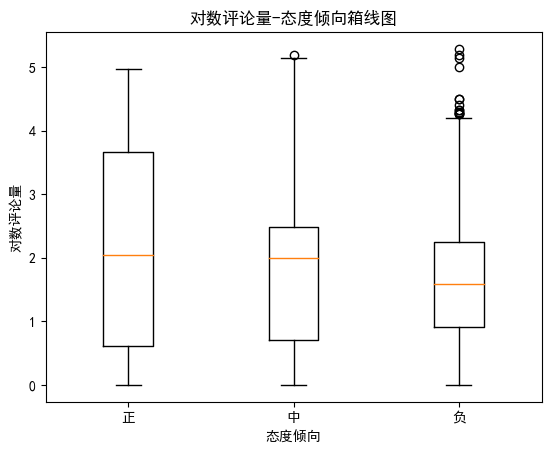

In [9]:
cname = 'com_sv_log'
str_cn = 'zf_sv'
d_types = list(df[str_cn].value_counts().keys())
vols = [df[df[str_cn] == d_type][cname] for d_type in d_types]
ax = plt.subplot()
ax.boxplot(vols)
ax.set_xticklabels(d_types)
plt.xlabel('态度倾向')
plt.ylabel('对数评论量')
plt.title('对数评论量-态度倾向箱线图')
plt.show()

分析：可以看到态度倾向中热议程度从大到小依次为正、负、中。

## 4.建模

### 交叉验证调参

自变量与因变量：

In [10]:
X = df2
dicy = {'热议':1, '非热议':0}
Y = pd.DataFrame(df['hot_or_not'].apply(lambda x: dicy[x]))

按照8：2比例随机生成训练集和测试集

In [11]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X,Y, test_size = 0.2,random_state = 2023)

决策树五折交叉验证,调优参数为最大深度、最大特征数和分裂标准：

In [12]:
from sklearn.metrics import roc_curve,auc,roc_auc_score
from sklearn.tree import DecisionTreeClassifier

length = len(xtrain)
score_star = 0
para_star = None 

for max_depth in [5, 10,15,20, None]:
    for max_features in [3,4,5,6,7,8,9]: # 21就是使用全部特征
        for criterion in ['gini', 'entropy']:
            auc_list = list()
            for k in range(5):
                xval = xtrain.iloc[int(k/5 * length):int((k+ 1)/5 * length), :]
                yval = ytrain.iloc[int(k/5 * length):int((k+ 1)/5 * length), :]
                xup = xtrain.iloc[0:int(k/5 * length), :]
                xdown = xtrain.iloc[int((k+ 1)/5 * length):, :]
                xtrain2 = pd.concat([xup, xdown])
                yup = ytrain.iloc[0:int(k/5 * length), :]
                ydown = ytrain.iloc[int((k+ 1)/5 * length):, :]
                ytrain2 = pd.concat([yup, ydown])
                ypre = DecisionTreeClassifier(max_depth = max_depth, max_features = max_features, criterion = criterion,random_state = 2023).fit(xtrain2, ytrain2).predict(xval)
                auc_list.append(roc_auc_score(yval, ypre)) # R2 score
            score = sum(auc_list)/ len(auc_list)
            if score > score_star:
                score_star = score
                para_star = [max_depth, max_features, criterion]
print(score_star, para_star)

0.7209035069300713 [10, 8, 'gini']


五折交叉验证的结果表明决策树最佳的参数为：最大深度为10，特征数为8，选择基尼系数作为分裂标准。

adaboost五折交叉验证，基学习器采用调参好的决策树，调优参数为基学习器的个数和学习率

In [13]:
from sklearn.ensemble import AdaBoostClassifier
import warnings
warnings.filterwarnings('ignore')
score_star = 0
para_star = None 

for n_estimators in [25,50,75,100]:
    for learning_rate in [1, 0.9, 0.8, 0.7,0.6,0.5]: # 21就是使用全部特征
        auc_list = list()
        for k in range(5):
            xval = xtrain.iloc[int(k/5 * length):int((k+ 1)/5 * length), :]
            yval = ytrain.iloc[int(k/5 * length):int((k+ 1)/5 * length), :]
            xup = xtrain.iloc[0:int(k/5 * length), :]
            xdown = xtrain.iloc[int((k+ 1)/5 * length):, :]
            xtrain2 = pd.concat([xup, xdown])
            yup = ytrain.iloc[0:int(k/5 * length), :]
            ydown = ytrain.iloc[int((k+ 1)/5 * length):, :]
            ytrain2 = pd.concat([yup, ydown])
            ypre = AdaBoostClassifier(DecisionTreeClassifier(max_depth = 10, max_features = 8, criterion = 'gini'),algorithm="SAMME",n_estimators=n_estimators, learning_rate=learning_rate, random_state = 2023).fit(xtrain2, ytrain2).predict(xval)
            auc_list.append(roc_auc_score(yval, ypre)) # R2 score
        score = sum(auc_list)/ len(auc_list)
        if score > score_star:
            score_star = score
            para_star = [n_estimators, learning_rate]
print(score_star, para_star)

0.748535793164469 [50, 0.7]


五折交叉验证的结果表明adaboost最佳的参数为：使用最大深度为10、特征数为8、基尼系数作为分裂标准的决策树作为基学习器，基学习器的个数为50，学习率为0.7

随机森林五折交叉验证，基学习器采用调参好的决策树，调优参数为基学习器的个数

In [14]:
from sklearn.ensemble import RandomForestClassifier
score_star = 0
para_star = None 
for n_estimators in range(50,200,5):
    auc_list = list()
    for k in range(5):
        xval = xtrain.iloc[int(k/5 * length):int((k+ 1)/5 * length), :]
        yval = ytrain.iloc[int(k/5 * length):int((k+ 1)/5 * length), :]
        xup = xtrain.iloc[0:int(k/5 * length), :]
        xdown = xtrain.iloc[int((k+ 1)/5 * length):, :]
        xtrain2 = pd.concat([xup, xdown])
        yup = ytrain.iloc[0:int(k/5 * length), :]
        ydown = ytrain.iloc[int((k+ 1)/5 * length):, :]
        ytrain2 = pd.concat([yup, ydown])
        ypre = RandomForestClassifier(max_depth = 10, max_features = 8, criterion = 'gini',n_estimators=n_estimators, random_state = 2023).fit(xtrain2, ytrain2).predict(xval)
        auc_list.append(roc_auc_score(yval, ypre)) # R2 score
    score = sum(auc_list)/ len(auc_list)
    if score > score_star:
        score_star = score
        para_star = [n_estimators]
print(score_star, para_star)

0.7577993734139508 [120]


五折交叉验证的结果表明随机森林最佳的参数为：使用最大深度为10、特征数为8、基尼系数作为分裂标准的决策树作为基学习器，基学习器的个数为120

### 使用上述调参得到的三种模型在测试集上测试效果并进行对比：

### （1）决策树

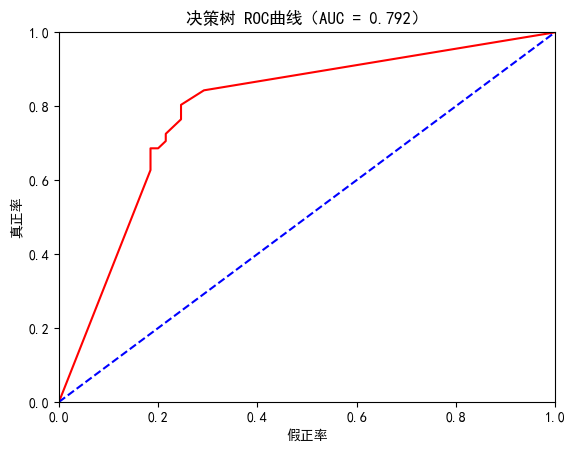

In [15]:
ypre = DecisionTreeClassifier(max_depth = 10, max_features = 8, criterion = 'gini',random_state = 2023).fit(xtrain, ytrain).predict_proba(xtest)[:, 1]
FPR,TPR,threshold=roc_curve(ytest,ypre,pos_label=1)
AUC=auc(FPR,TPR)
plt.figure()
plt.title(f'决策树 ROC曲线（AUC = {round(AUC, 3 )}）')
plt.xlabel('假正率')
plt.ylabel('真正率')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.plot(FPR,TPR,color='r')
plt.plot([0, 1], [0, 1], color='b', linestyle='--')
plt.show()

### （2）adaboost

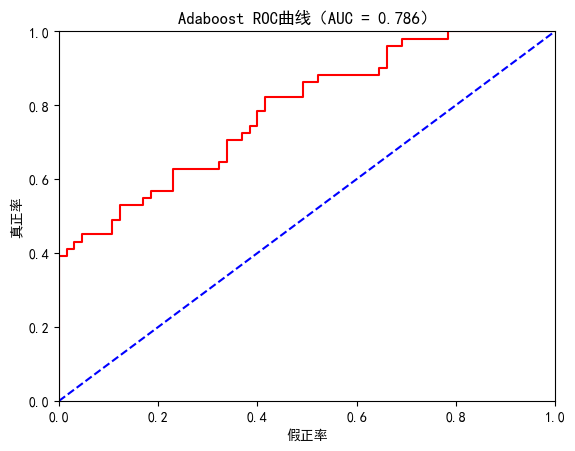

In [16]:
ypre = AdaBoostClassifier(DecisionTreeClassifier(max_depth = 10, max_features = 8, criterion = 'gini'),algorithm="SAMME",n_estimators=50, learning_rate=0.7, random_state = 2023).fit(xtrain, ytrain).predict_proba(xtest)[:, 1]
FPR,TPR,threshold=roc_curve(ytest,ypre,pos_label=1)
AUC=auc(FPR,TPR)
plt.figure()
plt.title(f'Adaboost ROC曲线（AUC = {round(AUC, 3 )}）')
plt.xlabel('假正率')
plt.ylabel('真正率')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.plot(FPR,TPR,color='r')
plt.plot([0, 1], [0, 1], color='b', linestyle='--')
plt.show()

### （3）随机森林

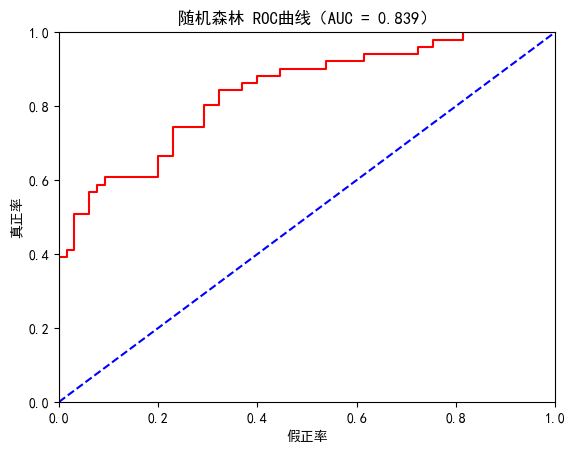

In [17]:
ypre = RandomForestClassifier(max_depth = 10, max_features = 8, criterion = 'gini',n_estimators=120, random_state = 2023).fit(xtrain, ytrain).predict_proba(xtest)[:, 1]
FPR,TPR,threshold=roc_curve(ytest,ypre,pos_label=1)
AUC=auc(FPR,TPR)
plt.figure()
plt.title(f'随机森林 ROC曲线（AUC = {round(AUC, 3 )}）')
plt.xlabel('假正率')
plt.ylabel('真正率')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.plot(FPR,TPR,color='r')
plt.plot([0, 1], [0, 1], color='b', linestyle='--')
plt.show()

模型比较结果：在验证集上调参后模型效能为随机森林优于adaboost优于决策树；最终在测试集上模型效能为随机森林明显优于决策树优于adaboost。 \
测试集上效果最佳为随机森林模型（使用最大深度为10、特征数为8、基尼系数作为分裂标准的决策树作为基学习器，基学习器的个数为120），对应的AUC为0.839